# Japan Deflation Analysis

- https://www.boj.or.jp/statistics/money/ms/index.htm/ (Single Data)
- https://www.e-stat.go.jp/statistics-by-theme/ (Multiple Data)
- https://www.boj.or.jp/statistics/index.htm/ (Multiple Data)
- https://data.worldbank.org/indicator (Multiple Data)
- https://stats.oecd.org/# (Multiple Data) Use this 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

## Introduction

In [2]:
full_data = pd.read_csv('data/full_data.csv')
full_data = full_data.set_index('Unnamed: 0')
full_data.index.rename('countries', inplace=True)
full_data.head()

,"Exports in goods, s.a.","Imports in goods, s.a.",Share prices,Consumer prices: all items,"Industrial production, s.a.","Permits issued for dwellings, s.a.","Passenger car registrations, s.a.","Retail trade (Volume), s.a.","Gross domestic product; constant prices, s.a.","GDP Private final consumption expenditure; constant prices, s.a.",...,"Unit Labour Costs, employment based",ICT capital deepening,Capital productivity,ICT capital,Non-ICT capital deepening,Non-ICT capital,"Unit Labour Costs, employment based, USD exchange-rate adjusted","Unit Labour Costs, USD exchange-rate adjusted",Capital quality,Total capital stock
countries,,,,,,,,,,,,,,,,,,,,,
Australia,-0.233699,-0.256102,-0.479847,-0.312487,-0.598316,-0.401856,-0.398980,-0.360682,0.050322,0.363567,...,-0.736760,-0.387543,-3.100986e-01,-1.092898e-01,1.390974,1.324842,-0.620196,-7.433811e-01,-1.032218,1.947551e+00
Austria,-0.342110,-0.317628,0.033466,0.085702,-0.301410,0.000000,-0.193004,-0.174619,-0.714010,-1.012482,...,-0.036970,2.203452,-1.168989e+00,1.655403e+00,0.618322,0.605985,-0.125199,-4.666341e-03,1.589605,2.433988e-01
Belgium,0.369286,0.276294,-0.630549,0.418660,-0.141498,-0.322663,-0.213916,-0.273772,-0.695831,-0.878660,...,-0.120314,0.620519,-6.526524e-01,5.285569e-01,0.645914,0.529186,-0.162655,-1.144269e-01,-0.302749,6.039751e-01
Brazil,-0.248746,-0.328803,0.863331,-1.505533,0.041675,0.000000,0.000000,-0.581818,-0.279993,0.060860,...,5.051742,0.000000,-9.017795e-15,-8.713533e-15,0.000000,0.000000,4.413033,1.067143e-15,0.000000,-8.299467e-15
Canada,0.363697,0.280111,-0.646126,0.417974,-0.185874,-0.361079,-0.119553,-0.314042,-0.467821,0.097990,...,-0.263241,-1.707186,2.640957e-01,-1.147591e+00,0.634743,0.733420,-0.382829,-4.047417e-01,-1.246592,9.531083e-01


## Finding similar countries to Japan

### t-SNE

In [3]:
data_reduced = TSNE(n_components=2).fit_transform(full_data)

In [28]:
japan = data_reduced[22]
others = np.delete(data_reduced, 22, axis=0)

country_data = [x for x in full_data.index if x != 'Japan']

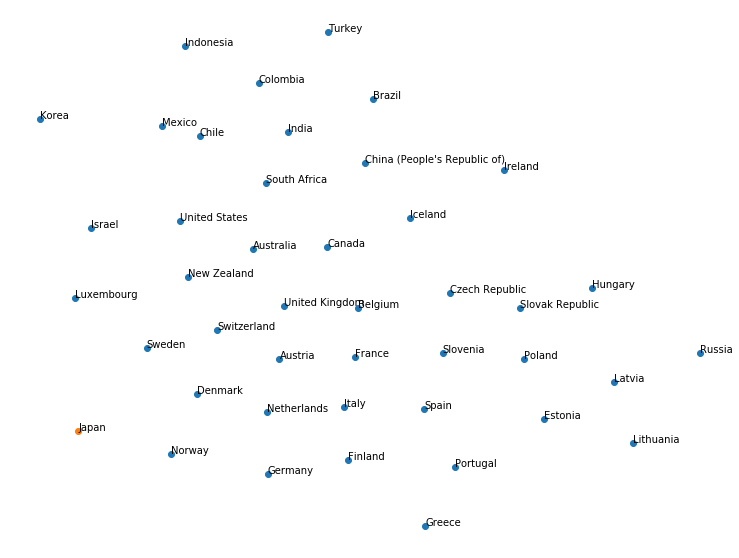

In [31]:
plt.figure(figsize=(13,10))
plt.scatter(others[:, 0], others[:, 1])
plt.scatter(japan[0], japan[1])

for i, txt in enumerate(country_data):
    plt.annotate(txt, (others[:, 0][i], others[:, 1][i]))
    
plt.annotate("Japan", (japan[0], japan[1]))
plt.axis('off')
plt.show()

### Cosine Similarity

In [33]:
cosine_sim = cosine_similarity(full_data, full_data)
countries = full_data.index
cosine_sim_score = list(zip(countries, cosine_sim[22]))
sorted_cosine = sorted(cosine_sim_score, key = lambda entry: entry[1], reverse=True)
get_top_10 = dict(sorted_cosine[1:11])
top_10_df = pd.Series(get_top_10)
print(top_10_df)

Portugal          0.441424
Finland           0.427525
Germany           0.395626
Italy             0.385656
Slovenia          0.354492
Netherlands       0.350669
Czech Republic    0.326844
Lithuania         0.311430
Latvia            0.301817
Korea             0.286295
dtype: float64
